In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widget
from IPython.display import display
import os
import datetime

In [3]:
def get_dir_all(dir):
    tmpArr = []
    for root, dirs, files in os.walk(dir,topdown=True):
        for name in files:
            if name.endswith(("log")):
                fullPath=os.path.join(root, name)
                tmpArr.append(fullPath)
    return tmpArr

In [4]:
def get_df(fileName):
    return pd.read_csv(fileName,delimiter='\t',header=3,names=['Time', 'R/W', 'Register', 'Data', 'F/N'])

# 12-02-2024
## DAC only
Masked everything else, exposed only DAC part of MIMOSIS2

In [5]:
%matplotlib widget
dacOnly1Dd = widget.Dropdown(options=get_dir_all("data/rw-dacs/2024-02-12/")
                             , description='Logs:')
display(dacOnly1Dd)

Dropdown(description='Logs:', options=('data/rw-dacs/2024-02-12/single-reg-rw-0x43-20240212-16-59-55.log', 'da…

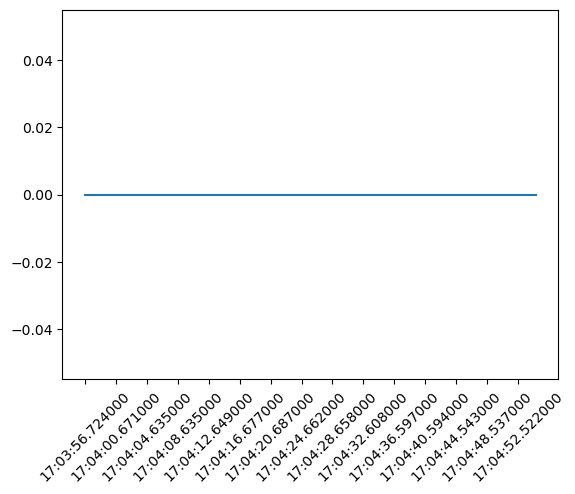

In [19]:
allFlips = [1 if i == 'F' else 0 for i in dataFrame['F/N'].values]

logTimes = dataFrame['Time'].values
formatedTimes=[datetime.datetime.strptime(i, '%Y-%m-%d-%H-%M-%S-%f').strftime('%H:%M:%S.%f') for i in logTimes]

tickSpace = int(len(formatedTimes)/14)
plotTicks = [formatedTimes[i] for i in range(0,len(formatedTimes),tickSpace)]
plotTicksInt = [i for i in range(0,len(formatedTimes),tickSpace)]

fig, ax = plt.subplots()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
ax.tick_params(axis='x', labelrotation=45, labelsize=10)
ax.set_xticks(plotTicksInt, plotTicks)
ax.plot(allFlips)